# Librerias

In [23]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt 

In [25]:
network = pd.read_csv("networks_2019.csv")
network.head(30)

,node_1,node_2,weighted,unweighted
0,AskThe_Donald,ShitNeoconsSay,3,0
1,Economics,OurPresident,33,0
2,europes,stupidpol,2,0
3,Classical_Liberals,killthosewhodisagree,2,0
4,Anarcho_Capitalism,IronFrontUSA,3,0
5,BannedFromThe_Donald,Political_Tumor,1,0
6,DebateAltRight,DrainTheSwamp,4,0
7,AnythingGoesNews,antiwar,1,0
8,LibDem,europes,1,0
9,ElizabethWarren,socialjustice101,1,0


# Construccion del Grafo No Dirigido con Peso

In [28]:
G = nx.from_pandas_edgelist(network,
                           source = 'node_1',
                           target = 'node_2',
                           edge_attr = 'weighted')

# Mostrar Datos Generados con el Grafo

In [31]:
print(f"Numero de nodos (usuarios): {G.number_of_nodes()}")
print(f"Numero de aristas (interacciones): {G.number_of_edges()}")

Numero de nodos (usuarios): 416
Numero de aristas (interacciones): 25500


# Calculo de la centralidad de grado

In [34]:
grado = nx.degree_centrality(G)
top_usuarios = sorted(grado.items(),
                     key = lambda x:[1], reverse = True)[:5]

print("\n Usuarios mas centrales (por grado):")
for usuarios, central in top_usuarios:
    print(f"{usuarios}: {central:.4f}")


 Usuarios mas centrales (por grado):
AskThe_Donald: 0.5663
ShitNeoconsSay: 0.1976
Economics: 0.8241
OurPresident: 0.5398
europes: 0.0795


# Extraer 5 usuarios mas centrales

In [37]:
usuarios = [usuario for usuario, _ in top_usuarios]
subgrafo = G.subgraph(usuarios)

# Visualizar Subgrafo

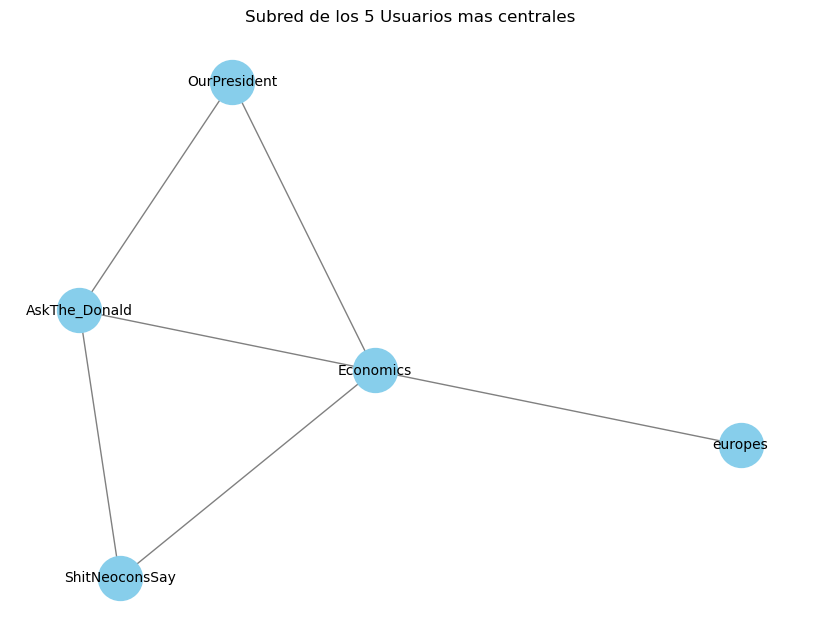

In [40]:
plt.figure(figsize = (8, 6))
pos = nx.spring_layout(subgrafo, seed = 42)
nx.draw(subgrafo, pos, with_labels = True,
       node_color = 'skyblue', edge_color = 'gray',
       node_size = 1000, font_size = 10)
plt.title("Subred de los 5 Usuarios mas centrales")
plt.axis('off')
plt.show()

# Detectar Componentes Conectados y Tamaño del mas Grande

In [44]:
componentes = sorted(nx.connected_components(G), key = len,
                    reverse = True)
print(f"\nNumero de componentes conectados: {len(componentes)}")
print(f"\nTamaño de componentes mas grande: {len(componentes[0])}")


Numero de componentes conectados: 1

Tamaño de componentes mas grande: 416


# Calculo de la Densidad de la Red

In [49]:
densidad = nx.density(G)
print(f"Densidad de la Red: {densidad:.4f}")

Densidad de la Red: 0.2954


# Calcular Diametro del Componente Principal

In [55]:
cmg = G.subgraph(componentes[0])
diametro = nx.diameter(cmg)
print(f"Diametro del componente principal: {diametro}")

Diametro del componente principal: 3
